In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest, chi2
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

### Data Expolratory 

In [125]:
df = pd.read_csv("data.csv")
df = df.iloc[:,1:]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [120]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [122]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

location        0.0
country         0.0
gender          0.0
age             0.0
vis_wuhan       0.0
from_wuhan      0.0
symptom1        0.0
symptom2        0.0
symptom3        0.0
symptom4        0.0
symptom5        0.0
symptom6        0.0
diff_sym_hos    0.0
result          0.0
dtype: float64

In [123]:
df['result'].value_counts(normalize=True) 

0    0.874855
1    0.125145
Name: result, dtype: float64

In [124]:
df["gender"] = df["gender"].astype("object")
df["country"] = df["country"].astype("object")
df["location"] = df["location"].astype("object");

<Figure size 432x288 with 0 Axes>

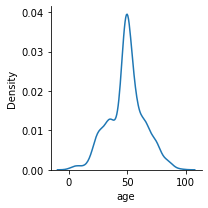

<Figure size 432x288 with 0 Axes>

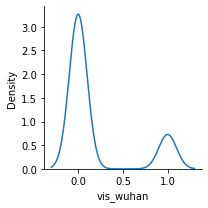

<Figure size 432x288 with 0 Axes>

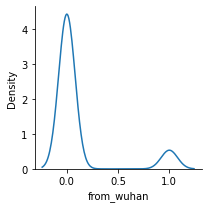

<Figure size 432x288 with 0 Axes>

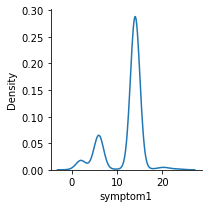

<Figure size 432x288 with 0 Axes>

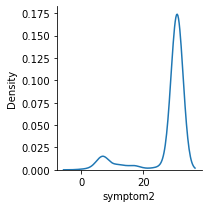

<Figure size 432x288 with 0 Axes>

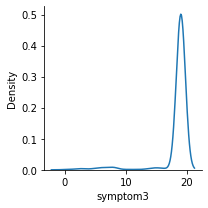

<Figure size 432x288 with 0 Axes>

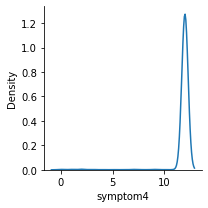

<Figure size 432x288 with 0 Axes>

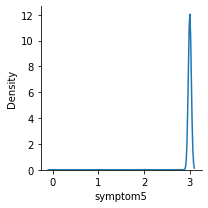

<Figure size 432x288 with 0 Axes>

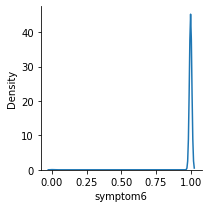

<Figure size 432x288 with 0 Axes>

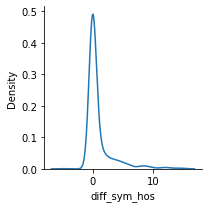

<Figure size 432x288 with 0 Axes>

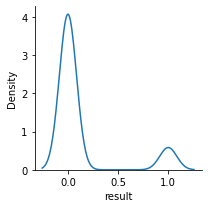

In [92]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show();

In [91]:
for col in df.select_dtypes("object"):
    print(f'{col :-<20} {df[col].unique()}')

location------------ [104 101 137 116 23 105 13 100 135 53 71 67 29 35 102 83 33 42 39 52 41 54
 46 31 103 132 47 99 40 17 88 27 6 4 109 96 25 68 79 76 18 70 16 82 117 1
 80 44 87 75 51 64 37 22 128 86 56 95 97 78 30 59 60 49 77 32 73 106 108
 98 110 114 19 8 74 131 113 38 115 126 127 125 92 107 118 124 90 12 28 9
 120 85 36 93 43 121 45 133 119 58 63 62 138 26 130 81 94 134 69 122 84
 129 57 2 89 65 112 11 72 20 5 123 21 136 55 14 7 91 111 34 50 66 61 10 48
 0 3 24 15]
country------------- [8 11 18 21 23 24 28 29 32 33 2 7 6 12 30 13 17 31 14 22 10 25 26 5 15 16
 20 19 4 3 0 1 9 27]
gender-------------- [1 0 2]


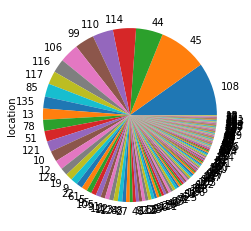

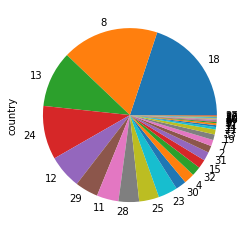

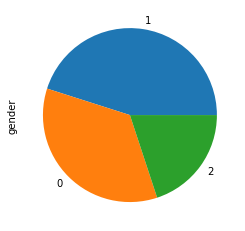

In [93]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.show()

In [70]:
featureList = ['location','country','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']
for i in featureList:
    print(f"{i} \t {df[i].nunique()}")
    

location 	 139
country 	 34
symptom1 	 25
symptom2 	 32
symptom3 	 20
symptom4 	 13
symptom5 	 4
symptom6 	 2
diff_sym_hos 	 18


In [126]:
df[df.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [127]:
df[df.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [128]:
df = df[~df.diff_sym_hos < 0]

In [21]:
df.drop("gender",axis = 1, inplace=True) 

In [22]:
categorical_columns = ['location','country']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state=3)

In [24]:
d = preprocessing.normalize(X)

names = X.columns.values.tolist()
scaled_df = pd.DataFrame(d, columns = names)

In [25]:
X_new = SelectKBest(chi2, k = 14).fit_transform(scaled_df, y)
X_new.shape

(861, 14)

In [26]:
def predict_and_score(clf,X, y):
    """
        clf: model 
        X: X_train data 
        y: label data
        return precision, recall, F1, roc_auc
    """
    y_predict = clf.predict(X)
    precision= precision_score(y, y_predict)
    recall = recall_score(y,y_predict)
    roc_auc = roc_auc_score(y, y_predict)
    F1 = f1_score(y, y_predict)
    return precision, recall, F1, roc_auc

In [27]:
dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[]}
weights = ['distance', 'uniform']
for k in range(1, int(len(X_train) ** 0.5), 2):
    for weight in weights: 
        knn = KNeighborsClassifier(n_neighbors=k, weights= weight)
        knn.fit(X_train, y_train)
        precision, recall, roc_auc, F1 = predict_and_score(knn, X_valid,y_valid)
        dic['clf'].append(knn)
        dic['recall'].append(recall)
        dic['precision'].append(precision)
        dic['f1'].append(F1)
        dic['roc_auc'].append(roc_auc)
knn_result = pd.DataFrame(dic)
best_knn_classifier =  knn_result.iloc[knn_result['recall'].idxmax(), 0]
print(best_knn_classifier.n_neighbors)

1


In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[84  2]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        86
           1       0.33      1.00      0.50         1

    accuracy                           0.98        87
   macro avg       0.67      0.99      0.74        87
weighted avg       0.99      0.98      0.98        87



In [129]:
def evaluate_measure(model, tuning= False): 
    """function used to evaluate the model and print the accuarcy and validation report data"""
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    print(f" confusion_matrix: \n{confusion_matrix(y_valid, y_pred)}")
    print(f"classification_report: \n{classification_report(y_valid, y_pred)}")
    print(f"f1_score : \n{f1_score(y_valid, y_pred, average='binary') }")

In [130]:
neighbors = np.arange(1, 10)
y_list = []
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_score(knn, X_train, y_train, cv=10).mean()
    y_list.append(y_pred)
    if y_pred >= max(y_list):
        max_N = k
    
print(f"The best N is {max_N} with value {max(y_list)}")    

The best N is 7 with value 0.9942028985507246


In [132]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
evaluate_measure(knn)

 confusion_matrix: 
[[85  1]
 [ 0  1]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.50      1.00      0.67         1

    accuracy                           0.99        87
   macro avg       0.75      0.99      0.83        87
weighted avg       0.99      0.99      0.99        87

f1_score : 
0.6666666666666666


***

In [116]:
lr = LogisticRegression(solver='lbfgs')
evaluate_measure(lr)

 confusion_matrix: 
[[85  1]
 [ 0  1]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.50      1.00      0.67         1

    accuracy                           0.99        87
   macro avg       0.75      0.99      0.83        87
weighted avg       0.99      0.99      0.99        87

f1_score : 
0.6666666666666666


In [48]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=7)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)

paralist = []
paralist = list(LR_search.best_params_.values())

lr = LogisticRegression(C= paralist[0] , penalty= paralist[1], solver= paralist[2])
lr.fit(X_train, y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


LogisticRegression(C=0.01, penalty='none')

In [50]:
y_pred = lr.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[86  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       0.00      0.00      0.00         1

    accuracy                           0.99        87
   macro avg       0.49      0.50      0.50        87
weighted avg       0.98      0.99      0.98        87



<StemContainer object of 3 artists>

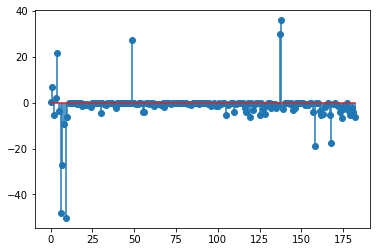

In [55]:
# flatten_w = W.flatten()
# flatten_w.sort()
# largest_2 = flatten_w[-2:]
# W == largest_2[0]
# first_one = np.where(W == largest_2[0])
# second_one = np.where(W == largest_2[1])
w_cof = lr.coef_
x_w = list(range(w_cof.shape[1]))
plt.stem(x_w, w_cof[0].flatten(), use_line_collection=True)

In [56]:
w_cof

array([[ 3.76881844e-01,  6.78859344e+00, -5.31094110e+00,
         2.16277823e+00,  2.16356787e+01, -3.36212056e+00,
        -4.82289708e+01, -2.69992388e+01, -9.09001834e+00,
        -5.02231796e+01, -6.29708215e+00, -1.28814086e-01,
        -2.15880913e-01,  0.00000000e+00, -8.29636872e-02,
        -6.68890858e-02, -4.86365696e-01, -2.83050370e-01,
        -8.10560929e-02, -1.57097350e+00, -4.60068345e-01,
        -8.78934836e-01, -4.85551838e-01, -9.39322341e-01,
        -1.77111109e+00,  0.00000000e+00, -5.05443088e-02,
        -7.82496262e-02,  0.00000000e+00, -4.26605020e-02,
        -4.33410703e+00, -1.37611324e-01, -3.59247639e-01,
        -9.59023553e-01, -7.51787665e-02,  0.00000000e+00,
        -2.34011595e-01, -9.87167286e-02, -6.21077330e-01,
        -2.22165929e+00, -1.80706966e-01, -7.56038061e-02,
        -2.31586554e-01, -1.96348279e-01, -7.98087426e-02,
        -1.61812618e-01, -9.08812497e-02, -5.34819356e-02,
         0.00000000e+00,  2.72358407e+01, -3.46534783e-0

In [38]:
#f1_score(y_valid, y_pred, average='binary') 
from sklearn import metrics
metrics.f1_score(y_valid, y_pred, average='weighted', labels=np.unique(y_pred))

0.9942196531791908

***

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[85  1]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.50      1.00      0.67         1

    accuracy                           0.99        87
   macro avg       0.75      0.99      0.83        87
weighted avg       0.99      0.99      0.99        87



In [41]:
f1_score(y_valid, y_pred, average='weighted') 

0.9903878470121665

In [42]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gnb = GaussianNB(var_smoothing = var_value)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [43]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[84  2]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        86
           1       0.33      1.00      0.50         1

    accuracy                           0.98        87
   macro avg       0.67      0.99      0.74        87
weighted avg       0.99      0.98      0.98        87



In [44]:
f1_score(y_valid, y_pred, average='weighted') 

0.9826233941852602